# Exploratory Data Analysis

Nick Sciarrilli <br>
Comp 4449 <br>
Midterm <br>
02.02.2022

#### Berkeley DeepDrive 

The purpose of this notebook is to better understand the bdd100k dataset. I will randomly sample 10,000 images and we will look into the details of what are in the images.


In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_json(f):
    with open(f, 'r') as fp:
        return json.load(fp)
    
root = 'data/bdd100k'

# raw is a list with 10,000 json samples
raw = load_json(os.path.join(root, 'labels/bdd100k_labels_images_train.json'))
raw = list(np.random.choice(raw, size=10000, replace=False))

In [3]:
df = pd.DataFrame.from_dict(raw)

df.drop(columns='timestamp', inplace=True)
df

,name,attributes,labels
0,098cff6f-dccb9e35.jpg,"{'weather': 'overcast', 'scene': 'highway', 't...","[{'category': 'car', 'attributes': {'occluded'..."
1,9097a21a-93970ff5.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...","[{'category': 'traffic sign', 'attributes': {'..."
2,59ac6b47-8566de5b.jpg,"{'weather': 'clear', 'scene': 'city street', '...","[{'category': 'traffic sign', 'attributes': {'..."
3,35d108d2-54fd804c.jpg,"{'weather': 'clear', 'scene': 'residential', '...","[{'category': 'car', 'attributes': {'occluded'..."
4,4cd5b47f-92b9c7f8.jpg,"{'weather': 'overcast', 'scene': 'highway', 't...","[{'category': 'car', 'attributes': {'occluded'..."
...,...,...,...
9995,8e2122c7-a5b877ce.jpg,"{'weather': 'clear', 'scene': 'city street', '...","[{'category': 'traffic sign', 'attributes': {'..."
9996,24d630ed-0b727c03.jpg,"{'weather': 'clear', 'scene': 'residential', '...","[{'category': 'car', 'attributes': {'occluded'..."
9997,a8613042-e019523a.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...","[{'category': 'car', 'attributes': {'occluded'..."
9998,a554178d-a07d9073.jpg,"{'weather': 'clear', 'scene': 'highway', 'time...","[{'category': 'bus', 'attributes': {'occluded'..."


In [4]:
type(df.attributes.iloc[2])

dict

In [5]:
conditions = df.attributes.apply(pd.Series)
conditions

,weather,scene,timeofday
0,overcast,highway,daytime
1,clear,highway,night
2,clear,city street,night
3,clear,residential,daytime
4,overcast,highway,daytime
...,...,...,...
9995,clear,city street,night
9996,clear,residential,daytime
9997,clear,highway,night
9998,clear,highway,night


In [6]:
df = pd.concat([df, conditions], axis=1)
df.drop(columns='attributes', inplace=True)
df

,name,labels,weather,scene,timeofday
0,098cff6f-dccb9e35.jpg,"[{'category': 'car', 'attributes': {'occluded'...",overcast,highway,daytime
1,9097a21a-93970ff5.jpg,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,night
2,59ac6b47-8566de5b.jpg,"[{'category': 'traffic sign', 'attributes': {'...",clear,city street,night
3,35d108d2-54fd804c.jpg,"[{'category': 'car', 'attributes': {'occluded'...",clear,residential,daytime
4,4cd5b47f-92b9c7f8.jpg,"[{'category': 'car', 'attributes': {'occluded'...",overcast,highway,daytime
...,...,...,...,...,...
9995,8e2122c7-a5b877ce.jpg,"[{'category': 'traffic sign', 'attributes': {'...",clear,city street,night
9996,24d630ed-0b727c03.jpg,"[{'category': 'car', 'attributes': {'occluded'...",clear,residential,daytime
9997,a8613042-e019523a.jpg,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,night
9998,a554178d-a07d9073.jpg,"[{'category': 'bus', 'attributes': {'occluded'...",clear,highway,night


In [7]:
def bb_count(test_dict):
    bb = 0
    poly = 0
    for i in test_dict:
        #print(i)
        try:
            if i['box2d']:
                bb += 1
        except:
            pass

        try:
            if i['poly2d']:
                poly += 1
        except:
            continue
    return bb

df['label_counts'] = df.labels.apply(bb_count)
df

,name,labels,weather,scene,timeofday,label_counts
0,098cff6f-dccb9e35.jpg,"[{'category': 'car', 'attributes': {'occluded'...",overcast,highway,daytime,26
1,9097a21a-93970ff5.jpg,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,night,9
2,59ac6b47-8566de5b.jpg,"[{'category': 'traffic sign', 'attributes': {'...",clear,city street,night,12
3,35d108d2-54fd804c.jpg,"[{'category': 'car', 'attributes': {'occluded'...",clear,residential,daytime,19
4,4cd5b47f-92b9c7f8.jpg,"[{'category': 'car', 'attributes': {'occluded'...",overcast,highway,daytime,10
...,...,...,...,...,...,...
9995,8e2122c7-a5b877ce.jpg,"[{'category': 'traffic sign', 'attributes': {'...",clear,city street,night,6
9996,24d630ed-0b727c03.jpg,"[{'category': 'car', 'attributes': {'occluded'...",clear,residential,daytime,32
9997,a8613042-e019523a.jpg,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,night,6
9998,a554178d-a07d9073.jpg,"[{'category': 'bus', 'attributes': {'occluded'...",clear,highway,night,5


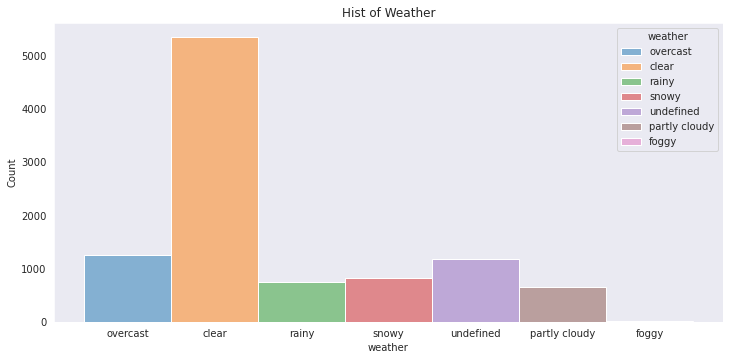

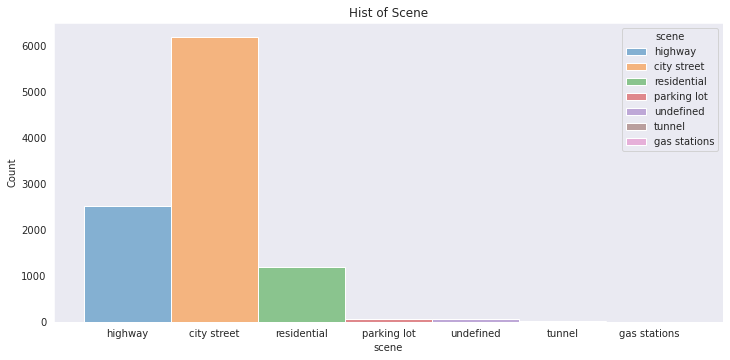

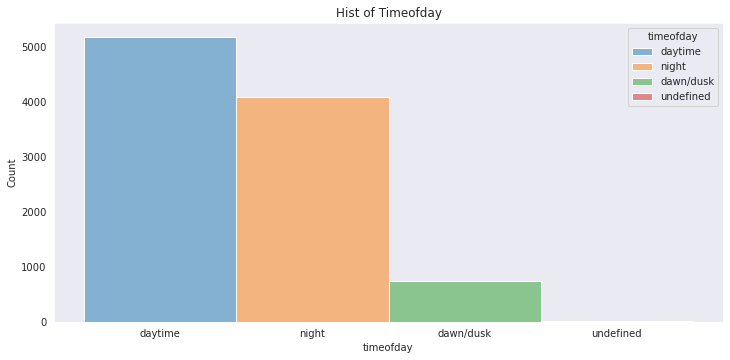

In [49]:
import seaborn as sns
sns.set_style("dark")

hist_cols = ['weather', 'scene', 'timeofday']
for col in hist_cols:
    fig, ax = plt.subplots(figsize=(12,5.5))
    sns.histplot(data=df, x=col, hue=col).set(title=f'Hist of {col.title()}');

In [9]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.histplot(data=df, x='label_counts', bins=69);

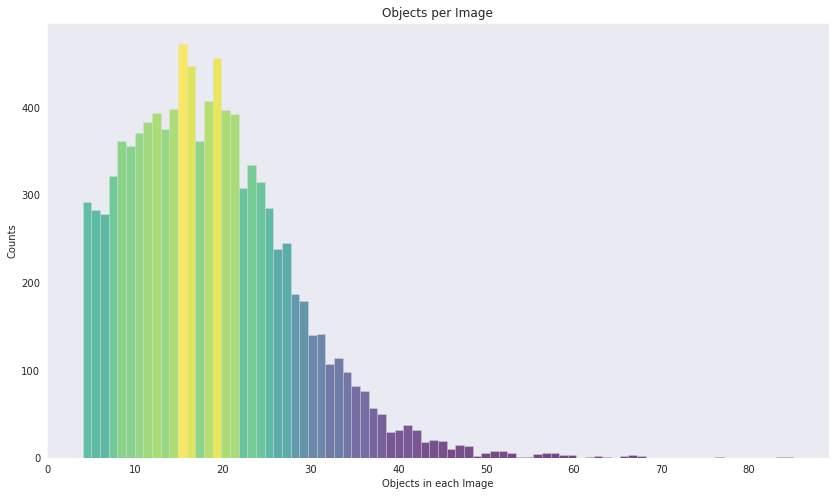

In [46]:
plt.figure(figsize=(14,8)) # Plot size
#plt.style.use('seaborn-whitegrid') # Style

# Building a histogram
n, bins, patches = plt.hist(df.label_counts, bins=82, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

# Changing properties of each bin
n = n.astype('int') # n should be integer, otherwise it wouldn't work properly

# Accessing each bin, changing color according to height
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

# Adding title and labels with custom font sizes
plt.title('Objects per Image', fontsize=12)
plt.xlabel('Objects in each Image', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.show()

In [11]:
# hist_cols = ['weather', 'scene', 'timeofday']

# for col in hist_cols:
#     temp = df[col].value_counts().to_frame()
#     fig, ax = plt.subplots(figsize=(12,5.5))
#     sns.barplot(x=temp.index, y=temp[col]).set(title=col.title(), xlabel=col, ylabel='count');

In [12]:
# hist_cols = ['weather', 'scene', 'timeofday']

# for col in hist_cols:
#     fig, ax = plt.subplots(figsize=(12,5.5))
#     sns.countplot(data=df, x=col, hue=col, order = df[col].value_counts().index);

In [13]:
test_dict = df.labels.iloc[0]

In [14]:
len(test_dict)

38

In [15]:
df.labels.apply(bb_count)

0       26
1        9
2       12
3       19
4       10
        ..
9995     6
9996    32
9997     6
9998     5
9999    12
Name: labels, Length: 10000, dtype: int64

In [16]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [17]:
from collections import defaultdict

In [18]:
labels = df.labels.iloc[0]

In [19]:
def object_counts(labels):
    counts = defaultdict(int)
    for label in labels:
        #print(label['category'])
        if label['category'] not in counts:
            counts[label['category']] = 1
        else:
            counts[label['category']] += 1
    return counts

In [20]:
object_counts(labels)

defaultdict(int,
            {'car': 20,
             'truck': 1,
             'traffic sign': 5,
             'drivable area': 3,
             'lane': 9})

In [21]:
df['object_counts'] = df.labels.apply(object_counts)

In [22]:
df

,name,labels,weather,scene,timeofday,label_counts,object_counts
0,098cff6f-dccb9e35.jpg,"[{'category': 'car', 'attributes': {'occluded'...",overcast,highway,daytime,26,"{'car': 20, 'truck': 1, 'traffic sign': 5, 'dr..."
1,9097a21a-93970ff5.jpg,"[{'category': 'traffic sign', 'attributes': {'...",clear,highway,night,9,"{'traffic sign': 5, 'car': 4, 'drivable area':..."
2,59ac6b47-8566de5b.jpg,"[{'category': 'traffic sign', 'attributes': {'...",clear,city street,night,12,"{'traffic sign': 2, 'traffic light': 2, 'perso..."
3,35d108d2-54fd804c.jpg,"[{'category': 'car', 'attributes': {'occluded'...",clear,residential,daytime,19,"{'car': 17, 'truck': 2, 'drivable area': 1, 'l..."
4,4cd5b47f-92b9c7f8.jpg,"[{'category': 'car', 'attributes': {'occluded'...",overcast,highway,daytime,10,"{'car': 9, 'traffic sign': 1, 'drivable area':..."
...,...,...,...,...,...,...,...
9995,8e2122c7-a5b877ce.jpg,"[{'category': 'traffic sign', 'attributes': {'...",clear,city street,night,6,"{'traffic sign': 3, 'car': 3, 'drivable area':..."
9996,24d630ed-0b727c03.jpg,"[{'category': 'car', 'attributes': {'occluded'...",clear,residential,daytime,32,"{'car': 23, 'traffic sign': 9, 'drivable area'..."
9997,a8613042-e019523a.jpg,"[{'category': 'car', 'attributes': {'occluded'...",clear,highway,night,6,"{'car': 3, 'traffic light': 3, 'drivable area'..."
9998,a554178d-a07d9073.jpg,"[{'category': 'bus', 'attributes': {'occluded'...",clear,highway,night,5,"{'bus': 1, 'car': 1, 'traffic sign': 3, 'driva..."


In [23]:
object_counts = df.object_counts.apply(pd.Series)
object_counts = object_counts.fillna(0)
object_counts

,car,truck,traffic sign,drivable area,lane,traffic light,person,bike,bus,rider,motor,train
0,20.0,1.0,5.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,5.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,1.0,2.0,2.0,9.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,17.0,2.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,1.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.0,0.0,3.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,23.0,0.0,9.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,3.0,0.0,0.0,2.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,1.0,0.0,3.0,2.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
object_counts.describe()

,car,truck,traffic sign,drivable area,lane,traffic light,person,bike,bus,rider,motor,train
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10.231200,0.424100,3.394000,1.788300,7.455300,2.605800,1.262000,0.0988,0.166400,0.058100,0.041000,0.000900
std,6.167167,0.870009,3.204308,1.089129,5.094723,3.213696,3.235738,0.5554,0.498935,0.280236,0.242745,0.029988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,3.000000,1.000000,7.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
75%,14.000000,1.000000,5.000000,2.000000,10.000000,5.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000
max,61.000000,11.000000,29.000000,7.000000,37.000000,20.000000,49.000000,15.0000,7.000000,4.000000,5.000000,1.000000


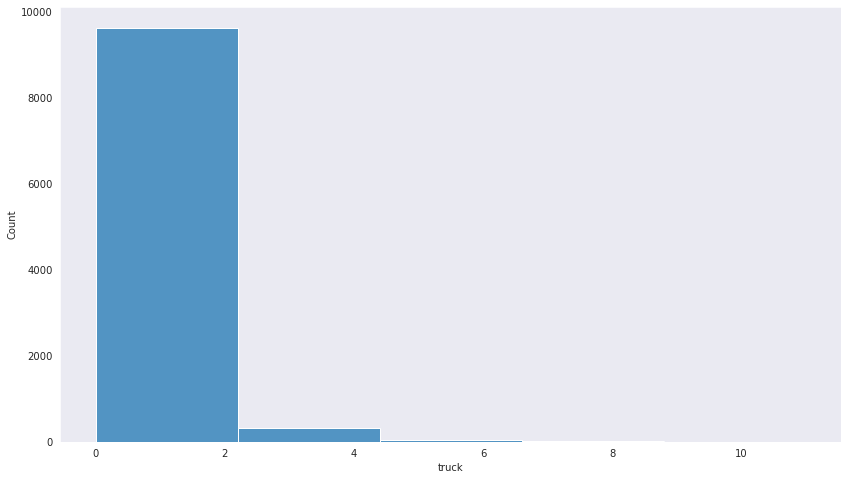

In [25]:
fig, ax = plt.subplots(figsize=(14,8))
sns.histplot(data=object_counts, x='truck', bins=5);

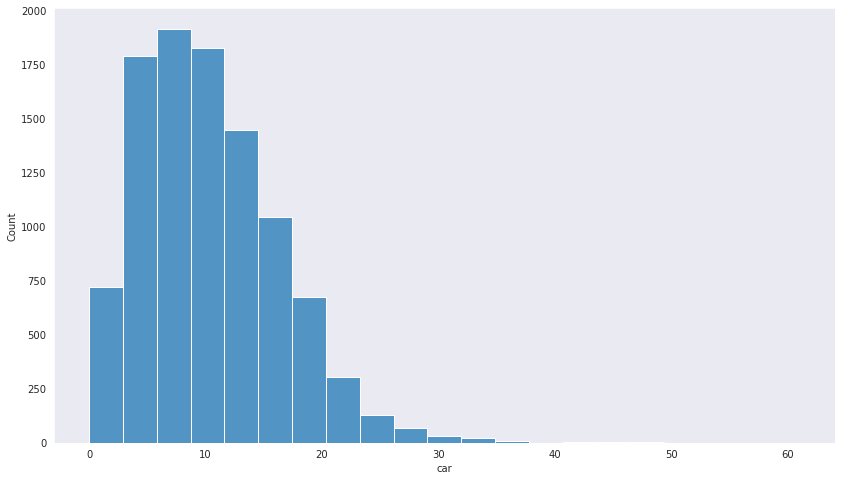

In [26]:
fig, ax = plt.subplots(figsize=(14,8))
sns.histplot(data=object_counts, x='car', bins=21);

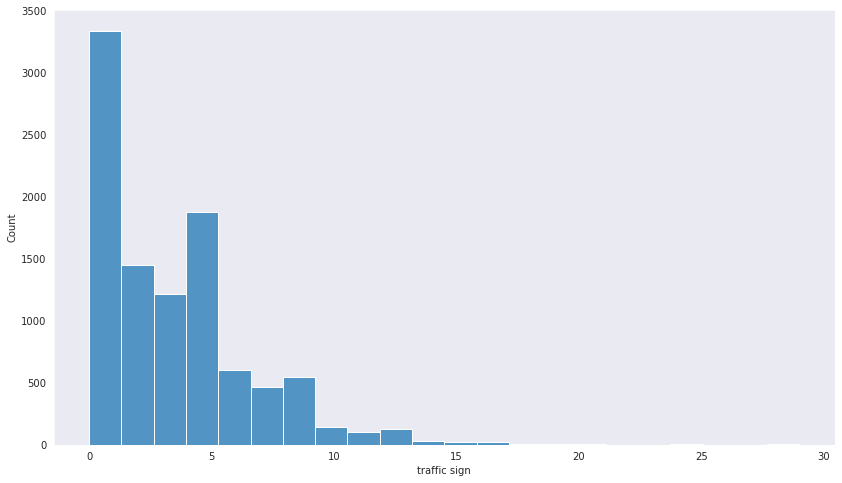

In [27]:
fig, ax = plt.subplots(figsize=(14,8))
sns.histplot(data=object_counts, x='traffic sign', bins=22);

# Appendix

In [28]:
import os
import json
import glob
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader
# from torchvision.datasets.folder import pil_loader

from dataset import BDDDataset

In [51]:
import transforms as T

def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [53]:
drive_dataset = BDDDataset('data/bdd100k', get_transform(train=False))

In [55]:
len(drive_dataset)

9998

In [56]:
torch.manual_seed(0)

train_set, test_set, val_set = torch.utils.data.random_split(drive_dataset, [7000, 2000, 998 ])

In [57]:
len(train_set), len(test_set), len(val_set)

(7000, 2000, 998)

In [58]:
loader = DataLoader(drive_dataset,
                    batch_size=2,
                    shuffle=True)

In [59]:
loader.batch_size

2

In [60]:
loader.num_workers

0

In [61]:
len(loader.dataset)

9998

In [66]:
from torchvision import transforms
transform = transforms.Compose(
    [transforms.Resize(64), transforms.ToTensor()])

loader = DataLoader(
    BDDDataset('data/bdd100k', get_transform(train=True)),
    batch_size=2,
    shuffle=True)

val_loader = DataLoader(
    BDDDataset('data/bdd100k', get_transform(train=False)),
    batch_size=2,
    shuffle=True)

In [67]:
len(loader.dataset)

9998

In [68]:
len(val_loader.dataset)

9998

In [69]:
image, label = loader.dataset.__getitem__(2)

In [70]:
type(image)

torch.Tensor

In [71]:
from matplotlib.patches import Rectangle

# plt.imshow(image)
# plt.gca().add_patch(Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none'))
# plt.show()

In [72]:
label['labels'][0]

tensor(9)

In [73]:
len(label['labels'])

26

In [77]:
# label['labels'][0]['box2d']['x1']

In [76]:
# plt.imshow(image)
# x1 = label['labels'][0]['box2d']['x1']
# x2 = label['labels'][0]['box2d']['x2']
# y1 = label['labels'][0]['box2d']['y1']
# y2 = label['labels'][0]['box2d']['y2']

# print(x1, y1, x2, y2)

# x = x1
# y = y2
# w = x2 - x1
# h = y1 - y2

# plt.plot(x1, y1, marker='v', color="white")
# plt.plot(x2, y2, marker='v', color="white")

# plt.gca().add_patch(Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none'))
# plt.show()

In [ ]:
image.size[0]

In [ ]:
import numpy as np
colors = ['C'+str(i) for i in range(10)]

In [ ]:
np.random.choice(colors)

In [ ]:
def show_random_image(loader, idx=None):
    colors = ['C'+str(i) for i in range(10)]
    n = len(loader.dataset)
    
    if idx is None:
        idx = np.random.randint(0, n)
        image, label = loader.dataset.__getitem__(idx)
    else:
        image, label = loader.dataset.__getitem__(idx)

    fig, ax = plt.subplots(figsize = (21,14))
    ax.imshow(image)

    idx = 0
    for i in label['labels']:
        #print(idx)
        idx += 1
        try:
            x1 = i['box2d']['x1']
            x2 = i['box2d']['x2']
            y1 = i['box2d']['y1']
            y2 = i['box2d']['y2']

            #print(x1, y1, x2, y2)

            x = x1
            y = y2
            w = x2 - x1
            h = y1 - y2

            # plt.plot(x1, y1, marker='v', color="white")
            # plt.plot(x2, y2, marker='v', color="white")
            color = np.random.choice(colors)
            ax.add_patch(Rectangle((x,y), w, h, linewidth=1.5, edgecolor=color, facecolor='none'))

            cat = i['category']
            ax.text(x, y1-12, cat, verticalalignment='top', color='white', fontsize=11)
        except:
            continue
#plt.show()

show_random_image(loader)

In [ ]:
len(label['labels'])

In [ ]:
type(label['labels'])

In [ ]:
label['labels'][0]['category']

In [ ]:
# label

In [ ]:
image.size

In [ ]:
plt.figure(figsize=(25,15))
colors = ['C'+str(i) for i in range(10)]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    idx = np.random.randint(0, len(loader.dataset))
    image, label = loader.dataset.__getitem__(idx)
    for i in label['labels']:
        #print(idx)
        idx += 1
        try:
            x1 = i['box2d']['x1']
            x2 = i['box2d']['x2']
            y1 = i['box2d']['y1']
            y2 = i['box2d']['y2']

            #print(x1, y1, x2, y2)

            x = x1
            y = y2
            w = x2 - x1
            h = y1 - y2

            # plt.plot(x1, y1, marker='v', color="white")
            # plt.plot(x2, y2, marker='v', color="white")
            color = np.random.choice(colors)
            plt.gca().add_patch(Rectangle((x,y),w,h,linewidth=1,edgecolor=color,facecolor='none'))

            cat = i['category']

            plt.gca().text(x,y1-20,cat,verticalalignment='top',color='white',fontsize=11)
        except:
            continue
    plt.imshow(image)
    #plt.xlabel(class_names[train_labels[i]])
    plt.tight_layout
plt.show()

# Trash Bin

In [ ]:
# def load_json(f):
#     with open(f, 'r') as fp:
#         return json.load(fp)


# def save_json(obj, f, *args, **kwargs):
#     with open(f, 'w') as fp:
#         json.dump(obj, fp, *args, **kwargs)


# class BDDDataset(Dataset):
#     def __init__(self, root, train=True, transform=None):
#         self.root = root
#         self.train = train
#         self.transform = transform
#         self.samples = None
#         self.prepare()

#     def prepare(self):
#         self.samples = []
#         if self.train:
#             label_paths = glob.glob(
#                 os.path.join(self.root, 'labels/train/*.json'))[:10000]
#             image_dir = os.path.join(self.root, 'images/100k/train')
#         else:
#             label_paths = glob.glob(
#                 os.path.join(self.root, 'labels/val/*.json'))
#             image_dir = os.path.join(self.root, 'images/100k/val')

#         for label_path in label_paths:
#             image_path = os.path.join(
#                 image_dir,
#                 os.path.basename(label_path).replace('.json', '.jpg'))
#             if os.path.exists(image_path):
#                 self.samples.append((image_path, label_path))

#     def __getitem__(self, index):
#         # TODO: handle label dict
#         image_path, label_path = self.samples[index]
#         image = pil_loader(image_path)
#         label = load_json(label_path)
#         if self.transform is not None:
#             image = self.transform(image)
#         return image, label

#     def __len__(self):
#         return len(self.samples)

In [ ]:
# import glob
# import os

# root = 'data/bdd100k'

# label_paths = glob.glob(
#     os.path.join(root, 'labels/train/*.json'))
# image_dir = os.path.join(root, 'images/100k/train')

# samples = []
# for label_path in label_paths:
#     image_path = os.path.join(
#         image_dir,
#         os.path.basename(label_path).replace('.json', '.jpg'))
#     if os.path.exists(image_path):
#         samples.append((image_path, label_path))

# index = 0
# image_path, label_path = samples[index]

# image = pil_loader(image_path)
# label = load_json(label_path)

# if transform is not None:
#     image = transform(image)

In [ ]:
# len(samples)

# samples[0]

# len(samples)